# Preprocessing

## imports and load data


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
bank_auth = pd.read_csv('./bank_auth.csv')

In [3]:
bank_auth.head()

,variance,skewness,curtosis,entropy,target
0,NaN,8.28950,-1.9213,-3.33320,0
1,-3.11280,-6.84100,10.7402,-1.01720,1
2,5.39150,9.99460,-3.8081,-3.36420,0
3,-1.30000,10.26780,NaN,-5.86380,0
4,-0.49241,0.89392,-1.6283,-0.56854,1


In [4]:
bank_auth.isna().sum()

variance    209
skewness    216
curtosis    242
entropy     212
target        0
dtype: int64

## Imbalance check

In [5]:
bank_auth["target"][bank_auth.target == 0].count()

762

In [6]:
bank_auth["target"][bank_auth.target == 1].count()

610

<AxesSubplot:xlabel='target', ylabel='count'>

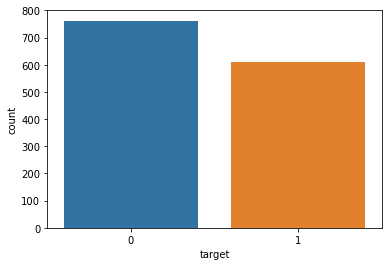

In [7]:
sns.countplot(x=bank_auth["target"])

## plots


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

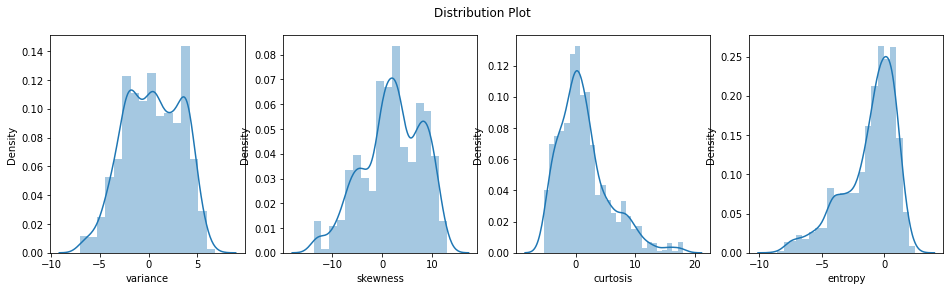

In [8]:
fig, ax = plt.subplots(ncols = 4, figsize=(16, 4))
fig.suptitle("Distribution Plot")
columns = bank_auth.columns[:-1]

for index, column in enumerate(columns):
    sns.distplot(bank_auth[column], ax=ax[index])

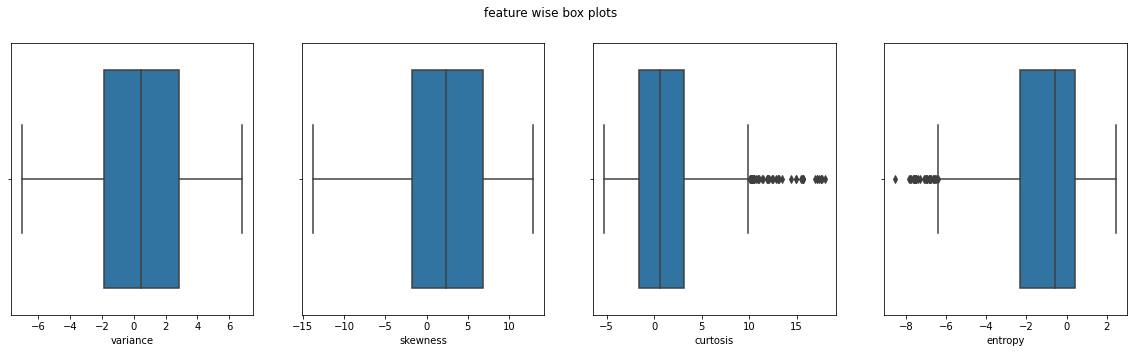

In [10]:
fig, ax = plt.subplots(ncols=4, figsize=(20, 5))
fig.suptitle("feature wise box plots")
columns = bank_auth.columns[:-1]

for index, column in enumerate(columns):
    sns.boxplot(x=column, data=bank_auth, ax=ax[index])

<AxesSubplot:>

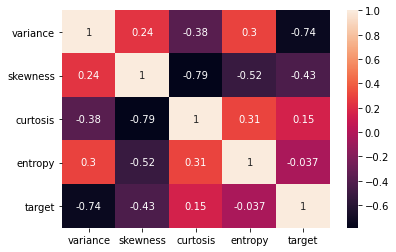

In [11]:
sns.heatmap(bank_auth.corr(), annot=True)

## filling NaN

In [12]:
bank_auth.describe()

,variance,skewness,curtosis,entropy,target
count,1163.000000,1156.000000,1130.000000,1160.000000,1372.000000
mean,0.404224,1.963184,1.383160,-1.181916,0.444606
std,2.873929,5.871327,4.288508,2.111129,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.842500,-1.708200,-1.553975,-2.314575,0.000000
50%,0.433900,2.334150,0.629915,-0.569835,0.000000
75%,2.841000,6.860700,3.093325,0.403863,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


In [13]:
bank_auth["variance"].fillna(bank_auth["variance"].mean(), inplace=True)

In [14]:
bank_auth["skewness"].fillna(bank_auth["skewness"].median(), inplace=True)
bank_auth["curtosis"].fillna(bank_auth["curtosis"].median(), inplace=True)
bank_auth["entropy"].fillna(bank_auth["entropy"].median(), inplace=True)

## outlier

In [15]:
bank_auth['skewness'][bank_auth.skewness > 8].count()

215

In [16]:
bank_auth['curtosis'][bank_auth.curtosis > 15].count()

14

## normalize / standardize

In [17]:
class DataNormalize:
  def min_max_normalize(self, df, cols):
    for col in cols:
      min = df[col].min()
      max = df[col].max()
      df[col] = (df[col] - min) / (max - min)
    return df

In [18]:
class DataStandardize:
  def standardization(self, df, cols):
    for col in cols:
      mean = df[col].mean()
      std = df[col].std()
      df[col] = (df[col] - mean) / std
    
    return df

In [19]:
std = DataStandardize()

In [20]:
bank_auth = std.standardization(bank_auth, bank_auth.columns[:-1])

In [21]:
bank_auth.describe()

,variance,skewness,curtosis,entropy,target
count,1.372000e+03,1.372000e+03,1.372000e+03,1.372000e+03,1372.000000
mean,-9.601310e-16,-7.207194e-16,3.747003e-16,8.522701e-16,0.444606
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.497103
min,-2.814372e+00,-2.929989e+00,-1.675038e+00,-3.818973e+00,0.000000
25%,-7.240001e-01,-4.480447e-01,-5.600372e-01,-3.720061e-01,0.000000
50%,-7.972664e-16,5.798193e-02,-1.589816e-01,2.648928e-01,0.000000
75%,7.565047e-01,7.460513e-01,3.039924e-01,6.765904e-01,1.000000
max,2.426686e+00,2.027569e+00,4.273726e+00,1.810392e+00,1.000000


# spliting data into training & testing


In [22]:
SPLIT_SIZE = 0.8
np.random.seed(0)
X = bank_auth.to_numpy().astype(np.float64)
np.random.shuffle(X)
y = X[:,-1]
X = np.delete(X, X.shape[1]-1, 1)

In [25]:
train_X = X[0:int(X.shape[0]*SPLIT_SIZE),:]
train_y = y[0:int(y.shape[0]*SPLIT_SIZE)]
test_X = X[int(X.shape[0]*SPLIT_SIZE):,:]
test_y = y[int(y.shape[0]*SPLIT_SIZE):]

# Accuracy calculation


In [27]:
def accuracy_metric(actual, predicted):
    correct = 0
    for i in range(len(actual)):
        if actual[i] == predicted[i]:
            correct += 1
    return correct / float(len(actual)) * 100.0

# Logistic regression


In [28]:
class Logistic_Regression:
  def __init__(self):
    self.w_gd = []
    self.w_nm = []
    self.cost_fn_gd = []
    self.cost_fn_nm = []

  def calc_sigmoid(self, result):
    """      
      it calculates sigmoid for each entry of given input array 
    """
    prob_of_rows = 1/(1+np.exp(-result))
    return prob_of_rows
  
  def fit_gd(self, X, Y, learning_rate, no_iterations):
    X = np.hstack([X, np.ones(shape=(X.shape[0], 1))])  # adding a column of ones it'll help to calculate b term in wx + b equation
    m = X.shape[0]                                      # no of rows in feature matrix
    w = np.zeros((1,X.shape[1]))                        # weight vector for logistic regression calculation
    

    for i in range(no_iterations):
        prob_of_rows = self.calc_sigmoid(np.dot(w,X.T)) # calculates sigmoid value for each row in feature matrix  
        Y_T = Y.T           
        self.cost_fn_gd.append((-1/m)*(np.sum((Y.T*np.log(prob_of_rows)) + ((1-Y.T)*(np.log(1-prob_of_rows)))))) # calcultes cost fn

        # gradient descent calculation
        dw = (1/m)*(np.dot(X.T, (prob_of_rows-Y.T).T))    
        w = w - (learning_rate * (dw.T))
    
    self.w_gd = np.copy(w)                                          # assigning weight to instance variable, it'll help predict method
    print("weight vector " + str(w))                                

  def fit_nm(self, X, Y, learning_rate, no_iterations):
    X = np.hstack([X, np.ones(shape=(X.shape[0], 1))])  # adding a column of ones it'll help to calculate b term in wx + b equation
    w = np.zeros((1,X.shape[1]))                        # weight vector for logistic regression calculation

    prob_of_rows = self.calc_sigmoid(np.dot(w,X.T))     # calculates sigmoid value for each row in feature matrix
    m = X.shape[0]                                      # no of rows in feature matrix
    Y_T = Y.T
    self.cost_fn = []

    for i in range(no_iterations):
        dtemp = (1/m)*(np.dot(X.T, (prob_of_rows-Y.T).T)) 
        db = (1/m)*(np.sum(prob_of_rows-Y.T))
        B = np.zeros((m, m))
        self.cost_fn_nm.append((-1/m)*(np.sum((Y.T*np.log(prob_of_rows)) + ((1-Y.T)*(np.log(1-prob_of_rows)))))) # cost calculation

        for i in range(m):
          B[i, i] = prob_of_rows[0, i] * (1 - prob_of_rows[0, i]) # adding p(1-p) at diagonal it'll help calculating hesian

        dw = np.dot(np.linalg.inv(np.dot(X.T, np.dot(B, X))), dtemp) # hessian.dw calculated here
        w = w -  (dw.T) 
    
    self.w_nm = np.copy(w)                                          # making weight as instance variable, it'll help predict method
    print(str(w))

  def test_gd(self, X, y):
    train_y_hat = self.predict_gd(X)
    print('Accuracy :',accuracy_metric(train_y_hat.T, y))

  def test_nm(self, X, y):
    train_y_hat = self.predict_nm(X)
    print('Accuracy :',accuracy_metric(train_y_hat.T, y))

  def predict_gd(self, X):
    X = np.hstack([X, np.ones(shape=(X.shape[0], 1))])
    prob = self.calc_sigmoid(np.dot(self.w_gd, X.T))
    y_pred = np.zeros((1,X.shape[0]))

    for i in range(X.shape[0]):
        if prob[0][i] > 0.5:
            y_pred[0][i] = 1
    return y_pred
  
  def predict_nm(self, X):
    X = np.hstack([X, np.ones(shape=(X.shape[0], 1))])
    prob = self.calc_sigmoid(np.dot(self.w_nm, X.T))
    y_pred = np.zeros((1,X.shape[0]))

    for i in range(X.shape[0]):
        if prob[0][i] > 0.5:
            y_pred[0][i] = 1
    return y_pred

# Analysis Logistic Regression

In [29]:
lr = Logistic_Regression()

In [30]:
lr.fit_nm(train_X, train_y, 0.1, 1000)

[[-1.2910234  -0.87779687 -0.72966455  0.05576375 -0.18622203]]


In [32]:
lr.test_nm(train_X, train_y)
lr.test_nm(test_X, test_y)

Accuracy : 89.79033728350045
Accuracy : 90.54545454545455


<ipython-input-33-35e2fd9f22e3>:5: UserWarning: Attempting to set identical bottom == top == 0.6931471805599453 results in singular transformations; automatically expanding.
  plt.axis((0,len(y_axis),np.amin(y_axis),np.amax(y_axis)))


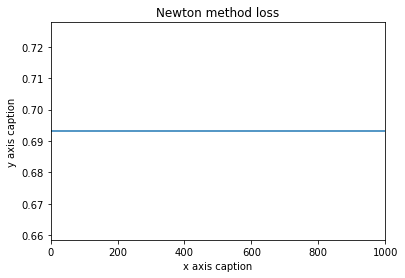

In [33]:
y_axis = lr.cost_fn_nm
plt.title("Newton method loss") 
plt.xlabel("x axis caption") 
plt.ylabel("y axis caption") 
plt.axis((0,len(y_axis),np.amin(y_axis),np.amax(y_axis)))
plt.plot(list(range(len(y_axis))), y_axis) 
plt.show()

In [34]:
lr.fit_gd(train_X, train_y, 0.1, 3000)

weight vector [[-3.96993931 -2.42694454 -1.6982602   0.02543396 -0.5196062 ]]


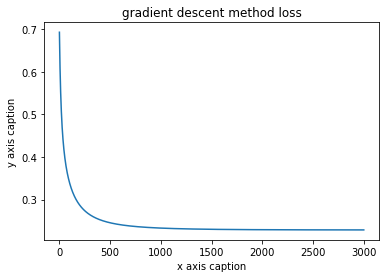

In [35]:
y_axis = lr.cost_fn_gd
plt.title("gradient descent method loss") 
plt.xlabel("x axis caption") 
plt.ylabel("y axis caption") 
plt.plot(list(range(len(y_axis))), y_axis) 
plt.show()

In [36]:
lr.test_gd(train_X, train_y)
lr.test_gd(test_X, test_y)

Accuracy : 89.88149498632635
Accuracy : 89.45454545454545


# Gaussian Naive Bayes

In [37]:
class GaussianNaiveBayes:
  def __init__(self):
    self.feature_means = []
    self.feature_std = []
    self.features = 0
    self.classes = 0

  def calc_prior(self, y):
      # calculates prior probability for all unique classes
      classes = np.unique(y)
      prior = []
      for i in classes:
          count = np.count_nonzero(y == i)
          prior.append(count/y.shape[0]) 
      return prior

  def calc_likelihood(self, mean, std, feat_val):
      p_x_given_y = (1 / (np.sqrt(2 * np.pi) * std)) *  np.exp(-((feat_val-mean)**2 / (2 * std**2 )))
      return p_x_given_y 

  def fit_gaussian(self, X, y):
      # calculates (number of classes * number of feature) gaussian distribution
      self.features = X.shape[1]
      self.classes = len(np.unique(y))
      self.feature_means = np.zeros(shape=(self.classes, self.features))
      self.feature_std = np.zeros(shape=(self.classes, self.features))

      for i in range(self.classes):
        unique = np.unique(y)
        indices = np.where(y == unique[i]) # stores indices of unique[i] class
        temp = X[indices]                  # fetches rows with class as unique[i] 
        mean = np.mean(temp, axis=0)       # calculates col wise mean for all features
        std = np.std(temp, axis=0)         # calculates col wise std for all features

        for j in range(self.features):
          # stores mean std class, feature wise
          self.feature_means[i, j] = mean[j] 
          self.feature_std[i, j] = std[j]
      
    
  def predict_nb(self, X, y):
      feature_count = X.shape[1]
      prior = self.calc_prior(y)
      Y_pred = []

      for x in X:
          class_labels = np.unique(y)
          likelihood = np.ones(len(class_labels)) # create list of 1's of size len(labels)

          for j in range(len(class_labels)):
              for i in range(feature_count):
                  likelihood[j] *= self.calc_likelihood(self.feature_means[j, i], self.feature_std[j, i], x[i])


          post_prob =  np.ones(len(class_labels))
          
          for j in range(len(class_labels)):
              post_prob[j] = likelihood[j] * prior[j] # in gnb divider term is constant 

          Y_pred.append(np.argmax(post_prob))

      return np.array(Y_pred)
    
  def test_gnb(self, X, y):
      Y_pred = self.predict_nb(X, y)
      print(accuracy_metric(y, Y_pred))


# Analysis Naive Bayes

## multivariate

In [38]:
nb = GaussianNaiveBayes()
nb.fit_gaussian(train_X, train_y)
nb.test_gnb(train_X, train_y)


81.03919781221514


In [39]:
nb.test_gnb(test_X, test_y)


77.81818181818181


## univariate analysis


In [40]:
# variance column
nb_u = GaussianNaiveBayes()
nb_u.fit_gaussian(train_X[:, 0].reshape(-1, 1), train_y)
nb.test_gnb(train_X[:, 0].reshape(-1, 1), train_y)
nb.test_gnb(test_X[:,0].reshape(-1,1), test_y)

81.13035551504102
79.63636363636364


In [41]:
# skewness column
nb_u = GaussianNaiveBayes()
nb_u.fit_gaussian(train_X[:,1].reshape(-1, 1), train_y)
nb.test_gnb(train_X[:, 1].reshape(-1, 1), train_y)
nb.test_gnb(test_X[:,1].reshape(-1,1), test_y)

61.16681859617138
62.909090909090914


In [42]:
# curtosis column
nb_u = GaussianNaiveBayes()
nb_u.fit_gaussian(train_X[:, 2].reshape(-1, 1), train_y)
nb.test_gnb(train_X[:, 2].reshape(-1, 1), train_y)
nb.test_gnb(test_X[:,2].reshape(-1,1), test_y)

49.68094804010939
56.36363636363636


In [43]:
# entropy column
nb_u = GaussianNaiveBayes()
nb_u.fit_gaussian(train_X[:, 3].reshape(-1, 1), train_y)
nb.test_gnb(train_X[:, 3].reshape(-1, 1), train_y)
nb.test_gnb(test_X[:,3].reshape(-1,1), test_y)

55.51504102096627
47.63636363636364
